# Hypothesis testing 

Syllabus 


- Descrete random variables and their characteristics 
- Continous random variables 
- Normal distribution 
- Sampling 
- Statistical analysis 
- Central limit theorem 


- Statistical estimation and confidence intervals 
- Hypothesis testing: solving problems with proportions
- Computing minimum size of sample dataset
- Student’s distribution (t-distribution)



# Random variable

Random variable is the variable that at testing acquires the **one from all possible values with some probability**.
<br>It is not known in advance what concrete possible value it will acquire because it depends on **random causes**.

A random variable can be either **discrete** (having specific values) or **continuous** (any value in a continuous range).

# Distributions

A statistical distribution, or probability distribution, describes **how values of random variable are distributed** - it shows which **values are common and uncommon**

In other words, probability distribution it is the mapping between the possible values and probabilities.


## Discrete Distribution vs. Continous Distribution

Discrete distribution is one that represents the **discrete variables**, then a continuous distribution is one that graphs **continuous variables**.

## Discrete Distributions

Table format presenting of **discrete variable** of flipping 2 dice:
<table style="width:60%">
    <tr>
        <td>$X$</td>
        <td>2 </td>
        <td>3 </td>
        <td>4</td>
        <td>5 </td>
        <td>6 </td>
        <td>7 </td>
        <td>8 </td>
        <td>9</td>
        <td>10 </td>
        <td>11 </td>
        <td>12 </td>
    </tr>
    <tr>
        <td>$P$</td>
        <td>1/36 </td>
        <td>2/36 </td>
        <td>3/36</td>
        <td>4/36 </td>
        <td>5/36 </td>
        <td>6/36 </td>
        <td>5/36 </td>
        <td>4/36</td>
        <td>3/36 </td>
        <td>2/36 </td>
        <td>1/36 </td>
    </tr>
    </table>


The distribution may be presented in analytical format - expression: 
$$p_{k} = P(X=x_k), k= \overline{(1,n)}$$



### Uniform distribution 
$$p_{k} =1/n, k= \overline{(1,n)}$$

### Binomial Distribution

`Bernoulli's trials` (`Binomial Trials`) are those trials in probability where only two possible outcomes are `Success` and `Failure` or `True` and `False`.

Binomial Distribution is the sequence of independent experiments with each experiment being a binomial trial.

$X$ is the random variable that rpresents the number of occurrences of the event in $n$ trials.


$$p_{m+1}=P(X=m) = C_{n}^m p^m q^{n-m}, \quad m= (\overline{0,n}), \quad q= 1-p$$

$C_{n}^m$ - number of combinations:
$$C_{n}^m = \frac{n!}{m! (n-m)!}$$


#### manual calcuulation of factorial 

In [1]:
def factorial(n): 
    fact = 1
    for i in range(1, n+1):
        fact = fact * i
    return fact
factorial(3), factorial(6)

(6, 720)

#### factorial implementation from `math`

In [2]:
import math
math.factorial(6)

720

#### manual combinations number

In [3]:
def combinations(m,n):
    return int (factorial(n)/factorial(m)/factorial(n-m))

combinations(m=3,n=5)

10

#### implementation of combinations number from `itertools`
It provides not the number but real combinations 

In [4]:
import numpy as np
import itertools
m = 3
n = 5 
data = np.arange (n)
combinations_iter = list(itertools.combinations(data, m))
len(combinations_iter), combinations_iter 

(10,
 [(0, 1, 2),
  (0, 1, 3),
  (0, 1, 4),
  (0, 2, 3),
  (0, 2, 4),
  (0, 3, 4),
  (1, 2, 3),
  (1, 2, 4),
  (1, 3, 4),
  (2, 3, 4)])

####  manual implementation of binomial distribution probability 


In [5]:
def binomial_prob(m,n,p):
    return combinations(m,n) * p**m * (1-p)**(n-m)

binomial_prob(m=10,n = 12, p=0.6)  

0.06385228185599999

#### implementation of binomial distribution probability  from `scipy`


In [6]:
from scipy.stats import binom
binom.pmf(k=10, n=12, p=0.6)

0.063852281856

#### check normalization of distribution 

$$\sum p_k=1 $$  

In [7]:
n = 10
bin_distr = [binom.pmf(k=m, n=n, p=0.6) for m in range(n+1)] # n+1 due to the case of n occurrences from n trials 
print ('check: ', sum(bin_distr))
bin_distr

check:  0.9999999999999996


[0.00010485760000000007,
 0.001572863999999999,
 0.010616832000000003,
 0.042467327999999964,
 0.11147673600000006,
 0.2006581248,
 0.2508226559999998,
 0.21499084799999987,
 0.12093235199999987,
 0.04031078399999996,
 0.006046617599999999]

In [8]:
# Lets check manual implementation
n = 10
bin_distr = [binomial_prob(m,n,p=0.6) for m in range(n+1)] 
print ('check: ', sum(bin_distr))
bin_distr

check:  1.0


[0.00010485760000000006,
 0.0015728640000000006,
 0.010616832000000005,
 0.042467328000000006,
 0.11147673600000003,
 0.20065812480000003,
 0.25082265600000003,
 0.21499084799999998,
 0.12093235199999998,
 0.04031078399999999,
 0.006046617599999997]

### Geometrical distribution

$X$ is the random variable that represents the number of `Bernoulli's trials` till the event occurred.

$$p_{n}=q^{n-1}p, \quad n= (\overline{1,\infty})$$

$p$ - probability of event in each independent trial 


### Characteristics of descrete distributions

Expected Value (*математичне сподівання*) 
$$ M(X) = \sum x_i  p_i $$ 

$i$ may be from $1$ to $n$  for finite set of values  or from $1$ to $\infty$ in case of countable infinite set of values

Dispersion:
$$ D(X) = M[X-M(X)]^2 = M[X^2]- [M(X)]^2  = \sum x_i^2  p_i  - [M(X)]^2$$ 

Standard deviation: 
$$ \sigma(X) = \sqrt {D(X)}$$


#### Characteristics of uniform distribution  
$$ M(X) = \frac{n+1}{1},  \quad  D(X) = \frac{n^2-1}{2}$$

#### Characteristics of binomial distribution
$$ M(X) = np,  \quad  D(X) = npq$$

#### Characteristics of geometrical distribution
$$ M(X) = \frac{1}{p},  \quad  D(X) = \frac {q}{p^2}$$


## Continuos Distributions

### Cumulative distribution function (функція розподілу ймовірностей)
`CDF` is the probability of random variable `X` will acquire the value less than argument `x`
$$F(x) = P(X<x) $$

Note: 
-  CDF is non-decreasing function: for $x1 < x_2$ leads to $F(x1) \geq F(x_2)$ 
- $P(a \leq X \leq b) = F(b)- F(a)$  
- Probability of random variable `X` will acquire the ceratin value $x_1$ :  $P(X = x_1) = 0$. It means when $X$ is continuous, we can ignore  the endpoints of intervals while finding probabilities of continuous random variables  

### Probability density function (густина розподілу ймовірностей)

`PDF` is function $f(x)$ which is derivative of $F(x)$: $f(x) = F'(x)$

Note: 
- $\int_{-\infty}^{\infty} f(x) \,dx = 1 $

- $P(a \leq X \leq b) = \int_{a}^{b} f(x) \,dx$


<img src = "pdf.jpg" height=500 width= 500 align="left">


### Characteristics of continuos distributions


Expected Value (*математичне сподівання*) 
$$ M(X) = \int_{-\infty}^{\infty} x f(x) \,dx $$ 

$i$ may be from $1$ to $n$  for finite set of values  or from $1$ to $\infty$ in case of countable infinite set of values

Dispersion:
$$ D(X) = \int_{-\infty}^{\infty}[X-M(X)] ^2 f(x)  \,dx   =  \int_{-\infty}^{\infty}x^2 f(x)  \,dx - [M(X)]^2$$ 

Standard deviation: 
$$ \sigma(X) = \sqrt {D(X)}$$


### Normal distribution 

$$ f(x)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-a)^2}{2\sigma^2}}$$

Note: 
$$a= M(x), \sigma= \sigma(X)$$

**Standard** Normal distribution Curve ($a=0, \sigma=1$) 
$$ f(x)= \frac{1}{ \sqrt{2\pi}} e^{-\frac{x^2}{2}}$$

#### Normal distribution curve (Gauss curve or Bell curve)

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

def f_gauss(x):
    return np.exp(-x**2 / 2)/ np.sqrt(2*np.pi)

f_gauss(-5),f_gauss(-1), f_gauss(0),  f_gauss(1), f_gauss(2), f_gauss(5)

(1.4867195147342979e-06,
 0.24197072451914337,
 0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 1.4867195147342979e-06)

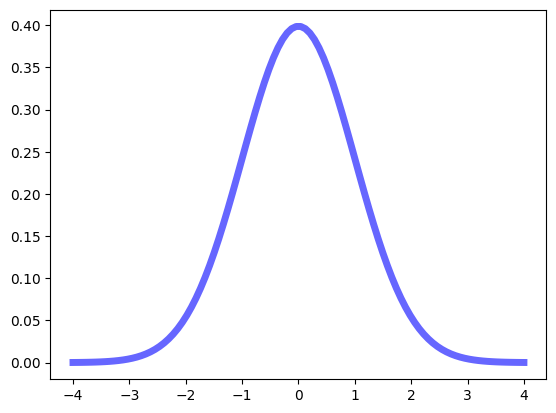

In [10]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-4 ,4, 100)
ax.plot(x, f_gauss(x),'b-', lw=5, alpha=0.6, label='Gauss')

For normal distribution, the **probability of random variable `X` will acquire the  value from interval $(\alpha,\beta)$** is calculated be the following formula: 
$$P(\alpha \leq X \leq \beta) = \Phi(\frac{\beta-a}{\sigma})-\Phi ( \frac{\alpha-a}{\sigma}) $$

Here the $ \Phi(z)$ is the **Laplas** Function, which is calculated as integral:

$$ \Phi(z)=  \int_0^{z}f(x) dx = \frac{1}{\sqrt{2\pi}}\int_0^{z}e^{-\frac{x^2}{2}}dx$$




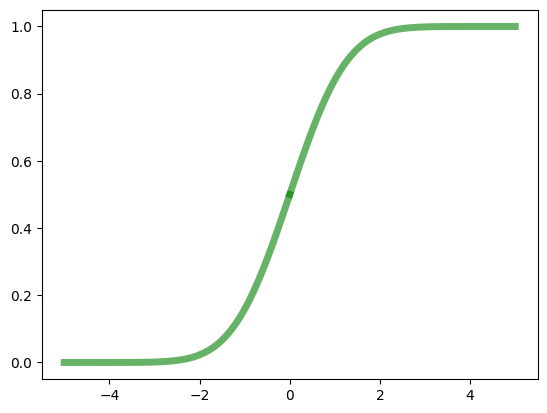

In [11]:
from scipy import integrate
import numpy as np


def f_gauss(x):
    return np.exp(-x**2 / 2)/ np.sqrt(2*np.pi)

def f_laplas(z): 
      return integrate.quad(f_gauss, 0.0, z) [0]

v_laplas= np.vectorize (f_laplas)
z = np.linspace(0 ,5, 100)

# v_laplas(z)

fig, ax = plt.subplots(1, 1)
# shifted to 0.5 since Laplas function is calculated from 0 to z, so for negative z 
# proper ap[proach would be to calculate the integral from -inf to value
ax.plot(z, v_laplas(z)+0.5,'g-', lw=5, alpha=0.6, label='Gauss')
ax.plot(-z, -v_laplas(z)+0.5,'g-', lw=5, alpha=0.6, label='Gauss')

The **Laplas** Function represents the area under Normal distribution curve

Text(1, 0.35, 'f(x)')

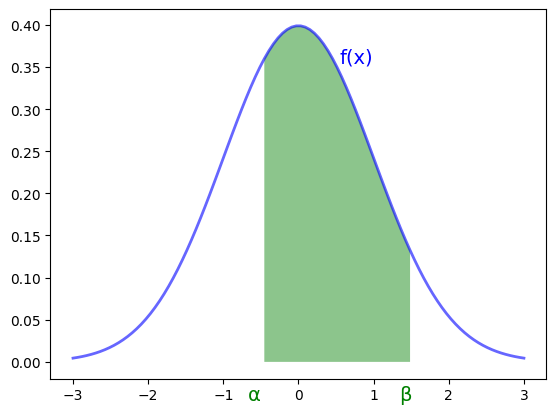

In [12]:
alpha, beta  = -0.5,1.5
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3 ,3, 100)
ax.plot(x, f_gauss(x),'b-', lw=2, alpha=0.6, label='Gauss')
x_range = x[(x>alpha)&(x<beta)]
ax.fill_between(x_range, 0,f_gauss(x_range) , facecolors='green',alpha=0.45)  
ax.text(alpha, -0.05 ,'\u03B1', ha= 'right', va= 'bottom',color= 'green',fontsize= 14)
ax.text(beta, -0.05 ,'\u03B2' , ha= 'right', va= 'bottom',color= 'green',fontsize= 14)
ax.text(1, 0.35 ,'f(x)', ha= 'right', va= 'bottom',color= 'blue',fontsize= 14)



The probability of deviation of normally distributed random variable from $a$ not more than $\epsilon$ could be calculated by the formula: 

$$P(|X-a| < \epsilon) = 2 \Phi(\frac{\epsilon}{\sigma})$$

Text(1, 0.35, 'f(x)')

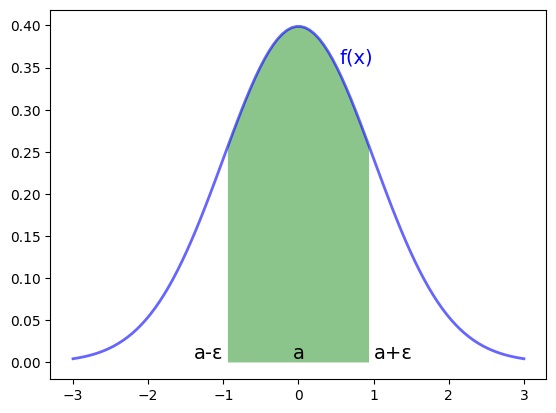

In [13]:
eps  = 1
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3 ,3, 100)
ax.plot(x, f_gauss(x),'b-', lw=2, alpha=0.6, label='Gauss')
x_range = x[(x>-eps)&(x<eps)]
ax.fill_between(x_range, 0,f_gauss(x_range) , facecolors='green',alpha=0.45)  
ax.text(-eps, 0 ,'a-\u03B5', ha= 'right', va= 'bottom',color= 'black',fontsize= 14)
ax.text(eps, 0 ,'a+\u03B5', ha= 'left', va= 'bottom',color= 'black',fontsize= 14)
ax.text(0, 0 ,'a', ha= 'center', va= 'bottom',color= 'black',fontsize= 14)
ax.text(1, 0.35 ,'f(x)', ha= 'right', va= 'bottom',color= 'blue',fontsize= 14)



#### Implementation of `pdf`  and `cdf`   from `scipy`


#### `pdf` implemenation 

In [14]:
from scipy.stats import norm
norm.pdf(0) # probabilistic density fuction 

0.3989422804014327

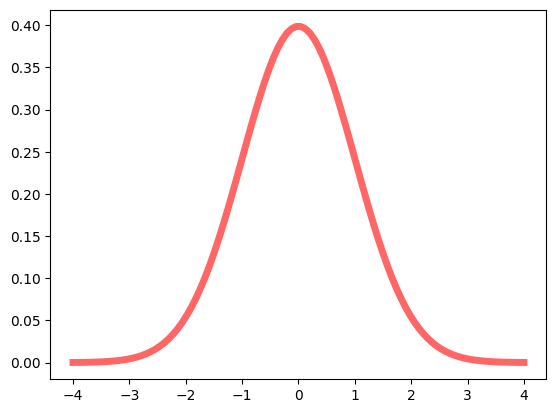

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)

x = np.linspace(-4,4, 100)

ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

#### `cdf` implemenation 

Area 

In [16]:
norm.cdf(-1),  norm.cdf(0),  norm.cdf(1)

(0.15865525393145707, 0.5, 0.8413447460685429)

In [17]:
area_values = norm.cdf(x)
area_values

array([3.16712418e-05, 4.44231742e-05, 6.19233895e-05, 8.57837169e-05,
       1.18103990e-04, 1.61598982e-04, 2.19751580e-04, 2.96995550e-04,
       3.98931102e-04, 5.32576001e-04, 7.06654332e-04, 9.31923968e-04,
       1.22154241e-03, 1.59146888e-03, 2.06089818e-03, 2.65271952e-03,
       3.39398992e-03, 4.31640908e-03, 5.45677857e-03, 6.85742491e-03,
       8.56656243e-03, 1.06385691e-02, 1.31341457e-02, 1.61203278e-02,
       1.96703190e-02, 2.38631167e-02, 2.87829020e-02, 3.45181740e-02,
       4.11606119e-02, 4.88036603e-02, 5.75408414e-02, 6.74638118e-02,
       7.86601927e-02, 9.12112197e-02, 1.05189266e-01, 1.20655313e-01,
       1.37656443e-01, 1.56223449e-01, 1.76368649e-01, 1.98084004e-01,
       2.21339621e-01, 2.46082740e-01, 2.72237254e-01, 2.99703828e-01,
       3.28360643e-01, 3.58064784e-01, 3.88654236e-01, 4.19950465e-01,
       4.51761512e-01, 4.83885505e-01, 5.16114495e-01, 5.48238488e-01,
       5.80049535e-01, 6.11345764e-01, 6.41935216e-01, 6.71639357e-01,
      

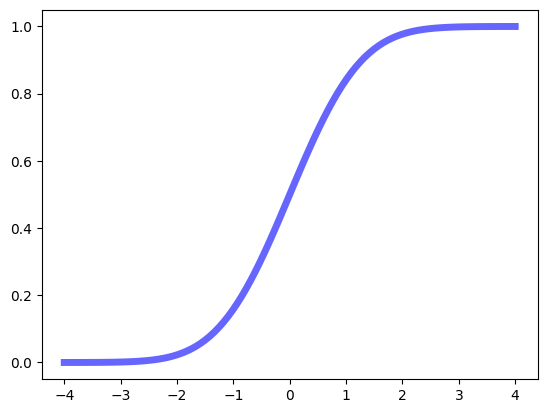

In [18]:
plt.figure()
plt.plot(x, norm.cdf(x),'b-', lw=5, alpha=0.6, label='cdf')


### Uniform distribution 

Probability dencity function: 

$$f(x) = \begin{cases}
            \frac{1}{(b-a)}, \text{if}  \, x \in [a,b] \\
            0, \text{if} \, x \notin [a,b]  \\
        \end{cases}$$
        
Then, `cdf`: 
$$F(x) = \begin{cases}
            0, \text{if}  \, x < a \\
            \frac{x-a}{(b-a)}, \text{if}  \,  a \leq x  \leq b\\
            1, \text{if}  \, x > b \\
        \end{cases}$$


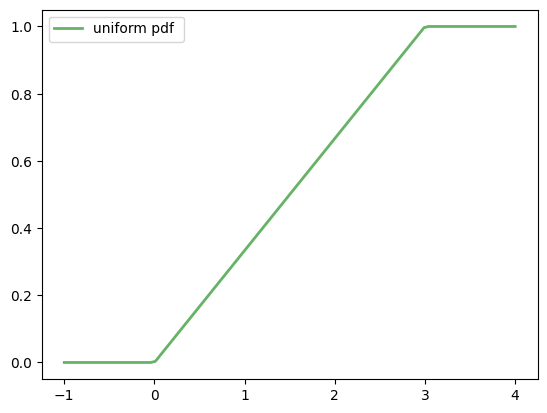

In [19]:
def pdf_uniform(x,a,b):
    if x<a: return 0 
    if x>b: return 1 
    return (x-a)/(b-a)


pdf_uniform_v = np.vectorize (pdf_uniform,otypes=[np.float64])
fig, ax = plt.subplots(1, 1)
x = np.linspace(-1,4, 100)
a,b= 0,3
ax.plot(x,pdf_uniform_v (x,a,b),'g-', lw=2, alpha=0.6, label='uniform pdf ')

plt.legend()

# Sampling 

Sampling is the process of executing trials for some distribution and observing factual evidences.  

Note: Before sampling we are talking about **probability distribution**, but having data we may now talk about **statistical distribution**

So there are following scenarious: 
- Probability distribiution  -> Sampling 
- Known dataset -> Calcularte statistical distribition -> Probability distribiution  -> Sampling 
- Unknown general dataset -> Sampling (<вибірка>) -> Caompute statistical distribition -> Estimate of distribution of general dataset



## Uniform distribution 

Return random integers from the `discrete uniform` distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).

In [20]:
import seaborn as  sns 

### `np.random.uniform`

In [21]:
import numpy as np 
a_uniform= np.random.uniform(low=0.0, high=1.0, size=100000)
a_uniform [:5]

array([0.48356943, 0.27581017, 0.81434645, 0.03072277, 0.97839891])

<Axes: ylabel='Count'>

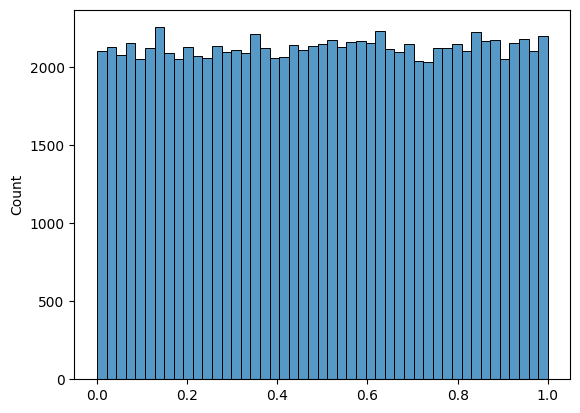

In [22]:
sns.histplot (a_uniform)

### `np.random.randint`


<Axes: ylabel='Count'>

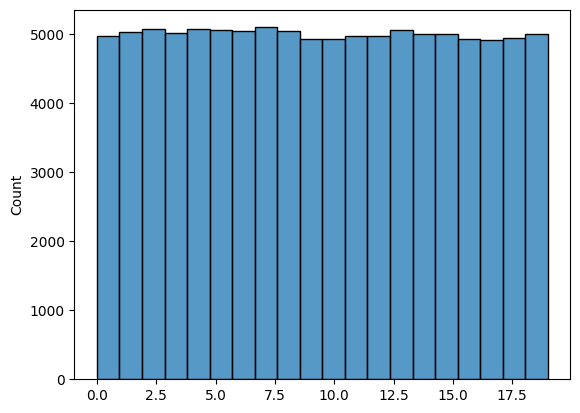

In [23]:
a_randint = np.random.randint(20,size= (100000))
sns.histplot (a_randint, bins = 20 )

### `np.random.randn`

In [24]:
np.random.randn(3,4) 

array([[-0.44262626, -0.85277177,  0.39445298, -0.93445393],
       [ 0.2042149 , -0.2946353 ,  0.11355884,  0.66553118],
       [ 1.06896339, -0.50699884,  1.22307586, -2.11815   ]])

<Axes: ylabel='Count'>

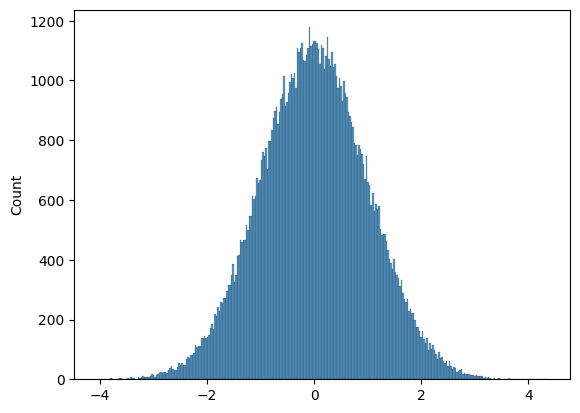

In [25]:
a_randn = np.random.randn(100000)
sns.histplot (a_randn, bins = 300 )

<Axes: ylabel='Count'>

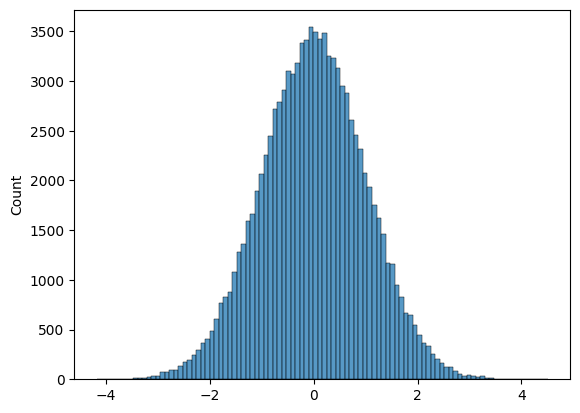

In [26]:
a_randn = np.random.randn(100000)
sns.histplot (a_randn, bins = 100 )

### `np.random.normal`

In [27]:
np.random.normal(loc=3, scale=4, size=(2,4)) # similar to randn but accepts more params 

array([[ 5.59742661, -4.07592249,  4.14312978,  8.09832656],
       [ 6.18359845, 10.50146735,  9.09025534, 10.93841158]])

<Axes: ylabel='Count'>

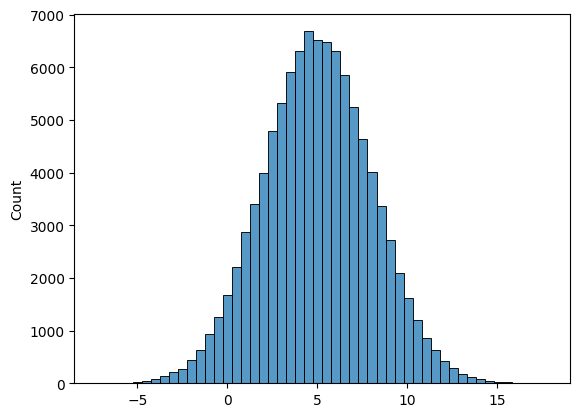

In [28]:
a_normal = np.random.normal(loc=5, scale=3, size=100000)
sns.histplot (a_normal, bins = 50 )

### `np.random.multinomial`

Could be used for sampling from binomial distribution 

In [29]:
pvals= [.6, .4] # (n, pvals, size=None)
flips= np.random.multinomial(10, pvals, 100000)[:,0] # n means from 10 trials, size means how many time is repeated
flips[:20]

array([8, 9, 8, 6, 5, 6, 4, 6, 7, 8, 6, 6, 6, 7, 8, 4, 4, 5, 8, 7])

<Axes: ylabel='Count'>

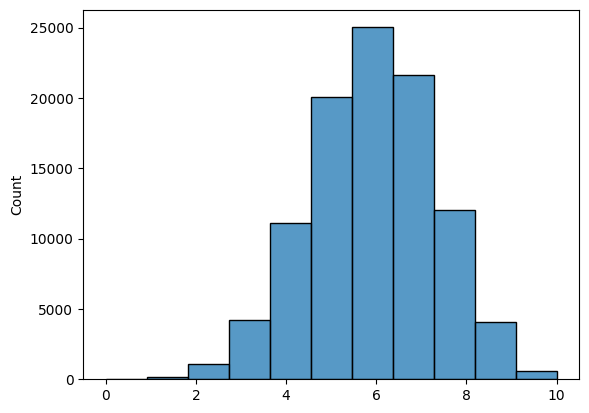

In [30]:
sns.histplot (flips, bins = 11)

In [31]:
# check there is cases on edges 
sum(flips==0), sum(flips==10)

(10, 620)

In [32]:
# recall the background probability distribution 
bin_distr

[0.00010485760000000006,
 0.0015728640000000006,
 0.010616832000000005,
 0.042467328000000006,
 0.11147673600000003,
 0.20065812480000003,
 0.25082265600000003,
 0.21499084799999998,
 0.12093235199999998,
 0.04031078399999999,
 0.006046617599999997]

<BarContainer object of 11 artists>

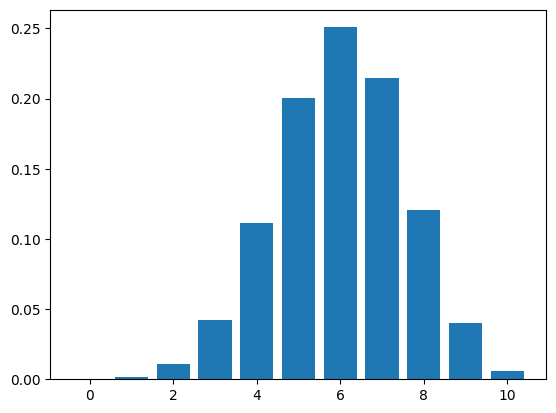

In [33]:
plt.bar(np.arange(11),bin_distr)

# Statistical analysis

We have general dataset (<генеральна сукупність> which is UNKNOWN) and sample dataset (observed <вибірка>). 

We may calculate statistical distribution of sample dataset calculate its characteristrics e.g. the mean (<середня вибіркова для кількісної ознаки>), or sample proportion for a quality feature  (<вибіркова частка для якісної ознаки>)) and there are several theorems that allow to estimate the characteristics of distribution of general data set.

## Central limit theorem 

Note: The mean/proportion of sample dataset is **random variable**. and so we may talk about its probability distribution. 

For instance, let's have sampling 50 random integer values from uniformdistribution and calculate the mean value. Then iterate this process let's say $n= 1000$ times. This way we get sample dataset of these means values. It appears the larger sample size of this data set the higher confidence that it has normal distribution 



In [34]:
# generate sample dataset of 1000 means values of 50 randomvalues from unifrom distribution.
means= [np.random.randint(20,size= (50)).mean() for i in range (1000)]
means[:10]

[9.2, 10.0, 9.06, 10.06, 7.72, 9.68, 10.9, 9.64, 12.3, 9.62]

<Axes: ylabel='Count'>

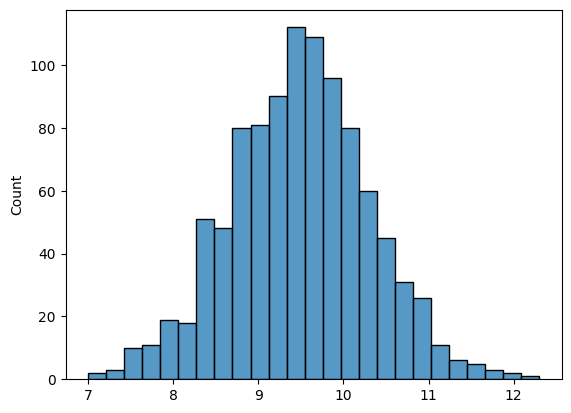

In [35]:
sns.histplot(means)

This is simple visualization of **Central Limit Theorem**.

In general the central limit theorem states that the sum of some number of independent and identically distributed random variables with finite variance will **tend to a normal distribution  as the number of these variables increases**.

There are variaty of formulations and extensions.

Usually it is about `sum` but all them are applicable for `mean/proportion`

<Axes: ylabel='Count'>

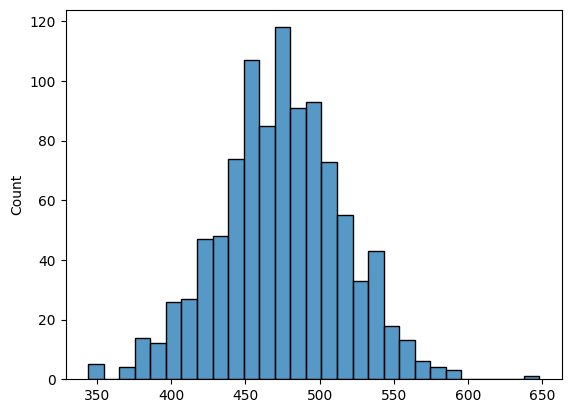

In [36]:
# lets visualize the distribution of sums values 
sns.histplot([np.random.randint(20,size= (50)).sum() for i in range (1000)])

Other samples of of Central Limit Theorem:  
- The probability distribution of the total distance traveled in a **random walk** (biased or unbiased) will follow a **normal distribution**.
- **Flipping a large number of coins** will have a **normal distribution for the total number of heads** (or reverses).

### Random walks 

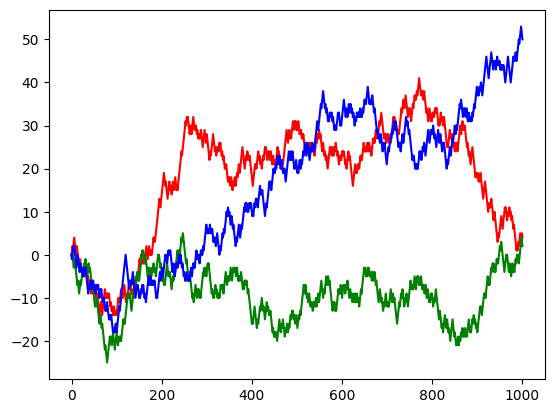

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random
def randomwalk1D(n):
    x, y = 0, 0
    # Generate the time points [1, 2, 3, ... , n]
    timepoints = np.arange(n + 1)
    positions = [y]
    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):
        # Randomly select either UP or DOWN
        step = random.choice(directions)
        
        # Move the object up or down
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1
        # Keep track of the positions
        positions.append(y)
    return timepoints, positions
rw1 = randomwalk1D(1000)
rw2 = randomwalk1D(1000)
rw3 = randomwalk1D(1000)
plt.plot(rw1[0], rw1[1], 'r-', label="rw1")
plt.plot(rw2[0], rw2[1], 'g-', label="rw2")
plt.plot(rw3[0], rw3[1], 'b-', label="rw3")
plt.show()

In [38]:
# observe total distance of each walk
rw_sums = [np.array(randomwalk1D(50)[1]).sum() for i in range (1000)]
rw_sums[:10]

[97, 123, 203, 137, 217, -191, 143, -35, 103, -265]

<Axes: ylabel='Count'>

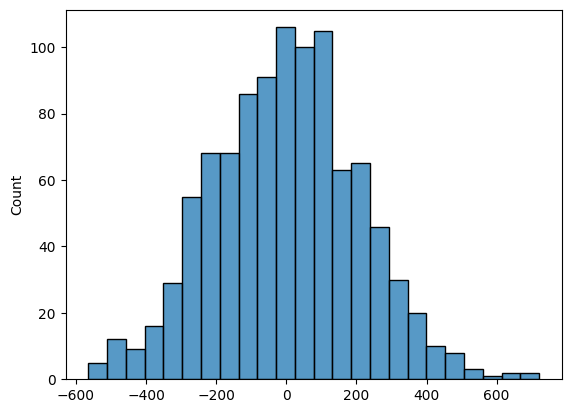

In [39]:
# visualize the distribution of values of total distances 
sns.histplot(rw_sums)

## Statistical Estimation 

Because real-world values are often the balanced sum of many unobservable random events, the central limit theorem also partially explains why **the normal distribution occurs quite often**. 

It also justifies the use of the **approximation for large statistical samples to the normal distribution** in controlled experiments.

To recall, <br>
**Statement**: The larger sample dataset size the higher confidence that **mean/proportion** has normal distribution. 

The parameters $a$ and $\sigma$ of this distribution are vary depending on what parameter is observed and how the sampling is  executed (e.g. with repeating or not).

**Theorem for mean** $x_g$ (mean of general dataset) in case of repeating sampling: 
$$a = x_g, \, \sigma= \sqrt{D_g/n}$$

**Theorem for proportion** $p = M/N$ (proporrtion of general dataset) in case of repeating sampling: 
$$a = p, \, \sigma= \sqrt{pq/n}, \, q= 1-p$$

For non-repearting sampling the expressions have additional contributors

- for mean: $a = x_g, \, \sigma= \sqrt{\frac {D_g}{n}\frac {N-n}{N-1}}$
- for proportion: $a = x_g, \, \sigma= \sqrt{\frac {pq}{n}\frac {N-n}{N-1}}$

Note: **Trick approach:** Since we may calculate the probability of variation of sample mean/proportion $P(|a-x_s| <  \epsilon)$ , so it allows compute the **confidence the parameter of general dataset will be in certain range** $P(|x_s-a| < \epsilon)$  
<br> This range depends on size of sample distribution (the large sample size the smalller range) 



## Confidence intervals 

So, we want to estimate the characteristics of the general distribution (mean/proportion) based on the sample dataset. 

Confidence probabilty (довірча ймовірність) of the estimation of parameter $\theta$(mean/propotion) of the general population based on $\hat{\theta}$ (mean/propotion) of the sample dataset is called the probability of deviating the parameter not more than $\Delta$:

$$\gamma =  P(|\theta-\hat{\theta}|<\Delta ) $$ 

and it could be computed by formula: 
$$ \gamma = 2 \Phi (\frac{\Delta}{\sigma})$$ 

here $\sigma$ is std (<Середня квадратична помилка (СКП) -  середнє квадратичне відхилення середної вибіркової або вибіркової частки>)


For convenience, the argument of $\Phi$ is defined  $$z = \frac{\Delta}{\sigma}$$ 
and called `Z-score` (Z-value)

For **mean** in case of **repeating sample dataset**:
$$\sigma = \sqrt{\frac{D_{в}}{n}}$$ 

For **proportion** in case of  **repeating sample dataset**:
$$\sigma = \sqrt{\frac{pq}{n}}$$ 

For **mean** in case of **non-repeating sample dataset**:
$$\sigma = \sqrt{\frac{D_{в}}{n} (1-\frac{n}{N})}$$ 

For **proportion** in case of  **non repeating sample dataset**:
$$\sigma = \sqrt{\frac{pq}{n}(1-\frac{n}{N})}$$ 

To summarize, considering  **proportion** only and  repeating sample dataset only, we have the following formulas: 

$$ \gamma = 2 \Phi (z) \quad  z = \frac{\Delta}{\sigma} \quad \sigma = \sqrt{\frac{pq}{n}} $$ 


and so we may solve the following three types of porblems

1) Calculate the confidence probability  $\gamma$ of parameter will not deviate by more than $\Delta$ 
   given the sample size $n$
 
2) Calculate the confidence interval (critical deviation $\Delta$) for a given probability $\gamma$ and given the sample size $n$
 
3) Determine the minimum sample size $n$, so that with the given confidence $\gamma$ the value of the parameter will not deviate by more than $\Delta$ 
 
And as a result, it is the base for testing the testing  static hypotheses


# Testing Hypothesis 

## Solving Problems With Proportions



### Task 
A tech company believes that percentage of residents in a town XYZ that own a cell phone is `70%`. 

A marketing manager believes this value to be different.
<br>He conducts a survey of `200` individuals and found that `130` responded yes to owning a cell phone. 

At `95%` confidence level, is there enough evidence to reject the null hypothesis?

( alterntive statement) At 5% significance level, is there enough evidence to check null hypothesis)

### Solution
**Start with definition**  (statement) of `null hypothesis`:
`Percentage (proportion) is 70%`

$$H_{0}: p = 0.7$$

So, `alternative hypothesis`:  $$H_{A}: p \ne 0.7$$


Proportion associated with null hypothisis is 

$p = 0.7$ so $ \quad q =1 - p = 0.3$

The following is known about samples: 

Sample size $n = 200$, and responded `yes` $x = 130$

So, sample proportion is
$$ \hat {p} = \frac{x}{n}= \frac{130}{200}= 0.65$$ 

Note: It is not far away from `0.7` so **it can get to the confidence interval**  $(\hat {p}- \Delta, \hat {p}+ \Delta)$, then we need to **accept the null hypothsis**.
<br> If it will be out of confidence interval, then we may **reject the null hypothsis** 


Note: This is **TWO tailed test** because  `NOT EQUAL` means it could be less or more than the value 

Next, 

`95%` means the area of accepting the null hupothesis.

![Z Score Table (same as Standard Normal Distribution Table](https://media.geeksforgeeks.org/wp-content/uploads/20201028221445/CIDiagram.png)

Thus, the rejection area is `0.05` , which means the left side of rejection area is `0.025` and the same is about right side of rejection area is `0.025` (see normal distribution shape below)

And so the point corresponds to half of FTR (Fail To Reject) area `0.95/2= 0.475`

Now we may find then find the `Z value` from 
[Z Score Table (same as Standard Normal Distribution Table](https://statcalculators.com/z-score-table-standard-normal-distribution/)

![Z Score Table (same as Standard Normal Distribution Table](https://statcalculators.com/wp-content/uploads/2018/02/z-score-02.png)

Note: The values in this table are actually the values of Laplas function mentioned before 

$$ \Phi(z)=   \frac{1}{\sqrt{2\pi}}\int_0^{z}e^{-\frac{x^2}{2}}dx$$


**So, continuing** 

We found the 0.475 in the table and it corresponds to $z = 1.96$

So, the right critical $z = 1.96$, the left critical $z = -1.96$

![The Area Between Two Z Scores](https://statcalculators.com/wp-content/uploads/2019/11/z-score-table-for-normal-distribution.png)

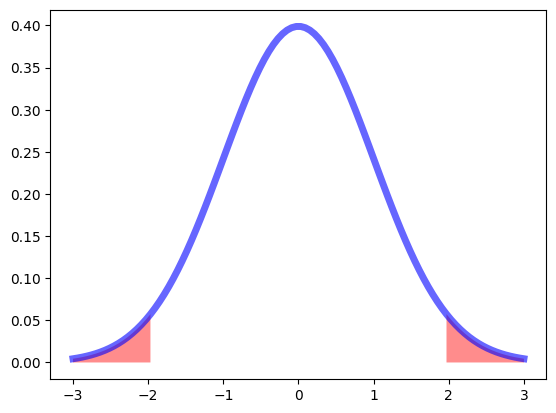

In [40]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3 ,3, 100)
ax.plot(x, f_gauss(x),'b-', lw=5, alpha=0.6, label='Gauss')
x_left = x[x<-1.96]
x_right = x[x>1.96]
ax.fill_between(x_left, 0,f_gauss(x_left) , facecolors='red',alpha=0.45)  
ax.fill_between(x_right, 0,f_gauss(x_right) , facecolors='red',alpha=0.45)  


#### Note: there are other  table of cumulative values

It is also called [Z SCORE TABLE](https://www.z-table.com/)

In fact it's just `+ 0.5` since it covers negative z values but not only from `0` to `z`



![](https://www.z-table.com/uploads/2/1/7/9/21795380/4694683_orig.png?ezimgfmt=rs:441x370/rscb1/ng:webp/ngcb1)

![accumulative values](https://www.z-table.com/uploads/2/1/7/9/21795380/8573955.png?ezimgfmt=rs:759x793/rscb1/ng:webp/ngcb1)

So, to make sure you are using proper table just take a look the value it starts from `0` or `0.5`

#### Using this table you need to compute cumulative area $A_{C}= 0.95+0.025= 0.975$ , and then get the same $z$ value = `1.96`

### Probability Point Function  `norm.ppf()`

Instead of table data you may use the implementation of Z-score from `scipy` 

It is reversed to `norm.cdf()`


In [41]:
from scipy.stats import norm
norm.ppf(.5), norm.ppf(.975)

(0.0, 1.959963984540054)

In [42]:
# check it exactly reverse functions 
norm.ppf(norm.cdf(1.64)) , norm.cdf(norm.ppf(0.95)) 

(1.64, 0.95)

**Continuing**  

Now we need to calculate the Z-value for our proportion (z calculated $Z_{c}$)

$$ Z_{c} = \frac{\Delta}{\sigma} \quad \Delta=  \hat{p}-p   \quad \sigma = \sqrt{\frac{pq}{n}}$$ 

$$ Z_{c} =   \frac{\hat{p}-p}{\sqrt{ \frac{p q }{n} }} = \frac{0.65-0.7}{\sqrt{ \frac{0.7 *0.3 }{200} }} = -1.54$$



**Note**: 

- General proportion $p$ is not a random variable.
- Forming the hypothesis, we assume that the general proportion $p$ is known and equal to `0.7`
- The sample proportion $\hat{p}$ is **random variable**, and with increasing $n$, its distribution approaches to the normal distribution with parameters based $p$ and $\sigma$
- So, accordingly, we estimate the probability of the trial (i.e. sample) the random variable $\hat{p}$ will not deviate from  $p$ more than by $\Delta$
- And that's why you need to take $p$ and $q$ (`0.7` і `0.3`) but not $\hat{p}$ and $\hat{q}$ (`0.65` і `0.35`)  
- Thus calculating the probability of deviation $\hat{p}$  from $p$  we estimate $p$ having $\hat{p}$. It is  tricky approach, becasue it looks at the beginning like we know $\hat{p}$ and and ${p}$ is unknown, in fact it is opposite)
   
    

z_critical= 1.96, z_calculated= -1.54


Text(-1.5430334996209172, 0.12130894491310133, '-1.54')

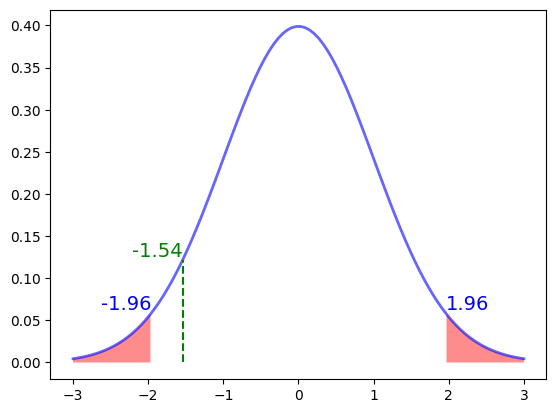

In [43]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3 ,3, 100)

z_critical = norm.ppf(0.975)
z_c= (0.65-0.7)/np.sqrt((0.7 *0.3)/200)
print (f'z_critical= {z_critical:.2f}, z_calculated= {z_c:.2f}')

ax.plot(x, norm.pdf(x),'b-', lw=2, alpha=0.6, label='Gauss')
x_left = x[x<-z_critical]
x_right = x[x>z_critical]
ax.fill_between(x_left, 0, norm.pdf(x_left) , facecolors='red',alpha=0.45)  
ax.fill_between(x_right, 0,norm.pdf(x_right) , facecolors='red',alpha=0.45)  


ax.plot ([z_c,z_c],[0, norm.pdf(z_c)], 'g--')

ax.text(-z_critical, norm.pdf(z_critical) ,'{:.3}'.format(-z_critical), ha= 'right', va= 'bottom',color= 'blue',fontsize= 14)
ax.text(z_critical, norm.pdf(z_critical) ,'{:.3}'.format(z_critical), ha= 'left', va= 'bottom',color= 'blue',fontsize= 14)
ax.text(z_c, norm.pdf(z_c) ,'{:.3}'.format(z_c), ha= 'right', va= 'bottom',color= 'g',fontsize= 14)


### Conclusion for task for proportion

$Z_{c} = -1.54$ in FTR (Fail To Reject) area  the  $(-1.96; 1.96)$, 

so $H_0$ is **ACCEPTED**. 

We may interpret it as it is **insufficient sample size to reject $H_0$**


## Summary guide for testing the hypothesis for  proportions 

1)  Define Null and Alternative hypotheses 
2)  Determine whether it is one tailed or two tailed tests 
3)  determine critical Z-value from confidence/significance level
4)  (draw the FTR area) 
5)  Calculate the Z-value for proportion
6)  Compare z-calculated and z-critical 
7)  Make conclusion towards 


## Computing minimum size of sample dataset

Let's have the same task for proportion and assume we need to compute the narrow sample size $n$. 
We may compute the  $n_{min}$ from  $ \sigma = \sqrt{\frac{pq}{n}}$

$\sigma = \frac{\Delta}{Z}$,   and $Z$ will compute for given confidence probabilty $\gamma = 2 \Phi (Z)$   

So 

$$n_{min} = \frac{z^2 \, p \, q}{\Delta^2} $$ 

For given $\gamma = 0.47.5$ we receive  $Z = 1.96$

and thus $$n_{min} = \frac{1.96 ^2 * 0.7 * 0.3}{0.05^2}  = 323$$ 


In [44]:
(1.96)**2 * 0.7 * 0.3 / (0.05)** 2

322.69439999999986

**Note**: This could be considered as alternative approach for testing hypothesis - 200 samples is **insufficient to reject the null hypothesis  $H_0$** with confidence level `95%`. In other words we will accept null hupothesis  $H_0$ untill we get the 323 sample, and if we have `65%` (or less) sample proportion, then we will be able to REJECT the $H_0$ about `70%` proportion of general dataset. 


___


## Hypothesis testing of difference of two means

### Task

A test was conducted between two different classes to see if there was any significant difference in the performance between the two teachers. 

The quiz scores from **15 students** of the <font color= 'green' size = 4> 1st class </font>   was a **mean score of 82** with a **standard deviation of 2.4**. 
<br>The quiz given in the <font color= 'green' size = 4> second class </font>  had a **mean score of 84** with a **standard deviation of 1.7** from **12 students**. 

Determine if there is a major difference at a **5% significance level**.

### Solution 

#### Lets summarize the provided information  

<font color= 'green' size = 4> 1st class: </font> 
$n_1 = 15,\quad \bar{x_1} = 82, \quad \bar{\sigma_1} = 2.4 $

<font color= 'green' size = 4> 2nd class: </font>
$n_2 = 12,\quad \bar{x_1} = 84, \quad \bar{\sigma_2} = 1.7 $

Significance level $\alpha = 0.05$ means **Confidence level** $\gamma = 0.95$ 

#### State Null and alternative Hypothses 

Null hypothesis:  $\mu_1 = \mu_2$
Alternative hypothsis  $\mu_1 \ne \mu_2$

#### Determine whether it is normal distribition or T-distribition 
$n_1$ and $n_2$  are less than 30 so we will use T-distribution

### Student’s t-distribution

Student’s t-distribution(**t-distribution**) is a probability distribution that is used in statistics for making inferences about the **population mean** when the **sample size is small** or when the **population standard deviation is unknown**. <br>
It is similar to the standard normal distribution (Z-distribution), but it has heavier tails.

<img src = "t-comparison.png" height=500 width= 500 align="left">


<font color = green >

### Difference Between T-Distribution and Normal Distribution

</font>


<table style="width:90%">
  <tr>
    <td  style="text-align:center"> <b>T-Distribution</b> </td>
    <td style="text-align:center"> <b>Normal Distribution</b> </td>
  </tr>
  <tr>
    <td   style="text-align:center">T-Distribution is defined by  its degree of freedom which itself depends upon the sample size</td>
    <td style="text-align:center">Normal distribution is defined by its mean and standard deviation</td>
  </tr>
  <tr>
    <td   style="text-align:center" >T- distribution is used when the sample size is small</td>
    <td style="text-align:center">Normal distribution is used when we have large number of data points in the dataset </td>
  </tr>
      <tr>
    <td   style="text-align:center">It has a heavier tail than normal distribution which means more data points are away from the mean of the distribution 	 </td>
    <td style="text-align:center">Normal distribution has a lighter tail than T-distribution which means more data points lie near the mean of the distribution</td>
  </tr>
  <tr>
    <td   style="text-align:center">We use T-distribution in hypothesis testing when the standard variation of the population is unknown 	</td>
    <td style="text-align:center">Normal distribution is used when the standard deviation is known </td>
  </tr>
  <tr>
    <td   style="text-align:center">T-Distribution has a larger range of critical values as compared to the normal distribution as this distribution has heavier tails 	</td>
    <td style="text-align:center">Normal distribution has a smaller range as compared to t-distribution</td>
  </tr>
</table>





 

#### Calculate degrees of freedom
$$\large{ df  = \frac {\left( \frac{\bar{\sigma_1}^2}{n_1} + \frac{\bar{\sigma_2}^2}{n_2} \right)^2}
{\frac {\left( \frac{\bar{\sigma_1}^2}{n_1} \right)^2 }{n_1-1} + 
\frac {\left( \frac{\bar{\sigma_2}^2}{n_2} \right)^2 }{n_2-1} 
}} =
\frac {\left( \frac{2.4^2}{15} + \frac{1.7^2}{12} \right)^2}
{\frac {\left( \frac{2.4^2}{15} \right)^2 }{14} + 
\frac {\left( \frac{1.7^2}{12} \right)^2 }{11} 
} = 24.7 = \approx 25
$$

In [45]:
(2.4**2 / 15 + 1.7**2 / 12)**2 / ((2.4**2 / 15 )**2 /14 + (1.7**2 / 12)**2 / 11)

24.701534743664148

### Calculate critical t-value 
Since significance level $\alpha= 0.05$, we get the left and right side is $\alpha/2= 0.025$
<br>and so we look the t-value $t(\alpha,k) =t(0.025,25) $ in the [Student t distribution table](https://www.researchgate.net/profile/Muhammad-Irfan-24/publication/236673256/figure/tbl2/AS:669401397338154@1536609138948/Student-t-distribution-table.png)



<img src = "t-table.png" height=1000 width= 1000 align="left">

So $$\large{t_{critical} = 2.06}$$

### Implementation of T-distribition in `scipy`

In [46]:
from scipy.stats import t
alpha = 0.05  # significance level = 5% 
print ('to compare the implementation with tabular data : df = 10, alpha =0.05  ', t.ppf(1 - alpha/2, 10) )
df = 25  # degrees of freedom           
t_cr = t.ppf(1 - alpha/2, df) 
print (r'df = {df}, alpha = {alpha}: ', t_cr )


to compare the implementation with tabular data : df = 10, alpha =0.05   2.2281388519649385
df = {df}, alpha = {alpha}:  2.059538552753294


### Calculate t-value for means 
Now we need calculate the $t_{calculated}$


$$\large{ t_{calculated}  = \frac {(\bar{x_1}-\bar{x_2}) - (\mu_1 - \mu_2)}
{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}=
\frac {(82-84) - 0}
{\sqrt{\frac{2.4^2}{15}+\frac{1.7^2}{12}}}
} = - 2.53
$$

In [47]:
import math
t_c = (82-84)/(math.sqrt(2.4**2/15+1.7**2/12))
t_c


-2.5301595052287063

t_critical= 2.06, t_calculated= -2.53


Text(-2.5301595052287063, 0.04038900473054588, '-2.53')

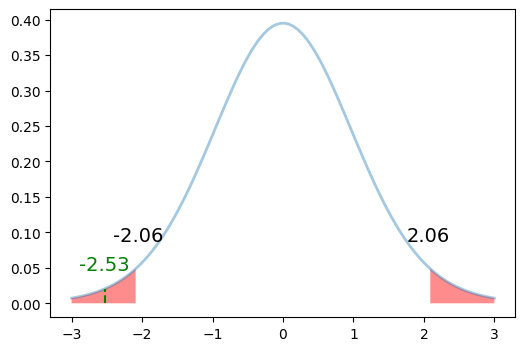

In [48]:
print (f't_critical= {t_cr:.2f}, t_calculated= {t_c:.2f}')

fig, ax = plt.subplots(1, 1, figsize = (6,4))
ax.plot(x, t.pdf(x,df),'-', lw=2, alpha=0.4)
x_left = x[(x<t.ppf(alpha/2,df))] 
x_right = x[(x>t.ppf(1-alpha/2,df))] 
ax.fill_between(x_right, 0,t.pdf(x_right,df) , facecolors='red',alpha=0.45)  
ax.fill_between(x_left, 0,t.pdf(x_left,df) , facecolors='red',alpha=0.45)  

ax.plot ([t_c,t_c],[0, t.pdf(t_c,df)], 'g--')

ax.text(-t_cr, t.pdf(t_cr,df)+0.03 ,'{:.3}'.format(-t_cr), ha= 'center', va= 'bottom',color= 'black',fontsize= 14)
ax.text(t_cr, t.pdf(t_cr,df)+0.03 ,'{:.3}'.format(t_cr), ha= 'center', va= 'bottom',color= 'black',fontsize= 14)
ax.text(t_c, t.pdf(t_c, df)+0.02 ,'{:.3}'.format(t_c), ha= 'center', va= 'bottom',color= 'g',fontsize= 14)


### Conclusion for task for two means 

$t_{c} = -2.53$ **in Rejection Area**, 

so $H_0$ is **REJECTED**. 

We may interpret it as it is **Enough sample size to claim the two means have significant difference**


---

## Summary for hypothesis testing of difference of two means 

- Define Null and Alternative hypotheses 
- Determine whether it is normal distribition or T-distribition 
- Calculate critical T or Z-value from confidence/significance level and calculated degree of freedom
- Calculate the T or Z-value for two means 
- Compare T/Z-calculated and T/Z-critical 
- Make conclusion towords 

# Home task 

## Home Task 1. Hypothesis Testing for Proportions

A company believes that percentage of resident in Ternopil own vehicle is `60%` or less. <br>
Sales manager disagree. He conducted a test surveying `250` residents and `170` responded yes to owning a vehicle. <br>

State the null hypothesis and alternative hypothesis. <br>
At 10% significance level, is there enough evidence to reject the null hypothesis?


**Note**: 
- Significance level is opposite to confidence level e.g. 10% significance level means 90% of confidence level.
- This is one taled task since is percentage `60%` **OR LESS**

In [ ]:
from scipy.stats import norm

```null hypothesis is: 60% <= percentage of residents own vehicle```

```alternative hypothesis is: 60% > percentage of residents own vehicle```

In [100]:
positive_responses = 170
total_responses = 250
p_hat = positive_responses / total_responses # 0.68

p_null = 0.6
q_null = 1 - p_null # 0.4

significance_level = 0.1  # 10%
confidence_level = 1 - significance_level  # 90%

# find the right critical value
z_critical = norm.ppf(confidence_level)
print("z_critical: ", z_critical)

# find the z-score
z = (p_hat - p_null) / np.sqrt(p_null * q_null / total_responses)
print("z: ", z)

z_critical:  1.2815515655446004
z:  2.5819888974716134


Text(2.5819888974716134, 0.014231864256978333, 'z')

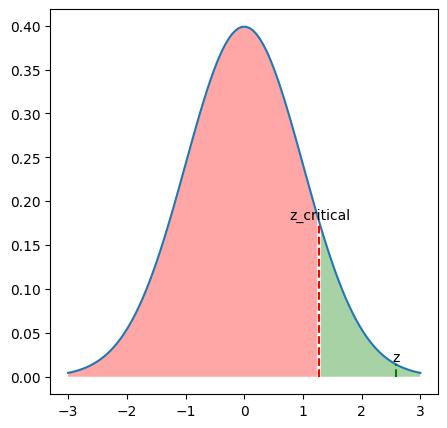

In [128]:
x_range = np.linspace(-3, 3, 100)
y_range = norm.pdf(x_range, 0, 1)

x_red = x_range[
    (x_range <= z_critical)
]  # area where we reject the \ alternative hypothesis
x_green = x_range[
    (x_range > z_critical)
]  # area where we accept the \ alternative hypothesis

plt.figure(figsize=(5, 5))
plt.plot(x_range, y_range)
plt.plot([z, z], [0, norm.pdf(z, 0, 1)], "g--")
plt.plot([z_critical, z_critical], [0, norm.pdf(z_critical, 0, 1)], "r--")
plt.fill_between(x_red, 0, norm.pdf(x_red), facecolor="red", alpha=0.35)
plt.fill_between(x_green, 0, norm.pdf(x_green), facecolor="green", alpha=0.35)
plt.text(
    z_critical,
    norm.pdf(z_critical),
    "z_critical",
    ha="center",
    va="bottom",
    color="black",
)
plt.text(z, norm.pdf(z), "z", ha="center", va="bottom", color="black")

<font color='green'>
Conclusion for task for proportion

There is enough evidence to reject the null hypothesis
</font>

### Expected result
### IT IS INCORRECT BECAUSE IT IS FOR 1% SIGNIFICANCE LEVEL AND TWO TAILED TEST
<img src = "hometask1_expected.png" height=500 width= 500 align="left">


## Home Task 2. Hypothesis Testing Difference of Two Means 

A business owner is in the process of deciding whether or not to invest in a new factory that refines oil in order to meet the high demand that commodity. A test showed that the old factory refines oil at a mean rate of `3.1L` per second at a standard deviation of `1.0` using a samp of `40`. <br>
The new factory was measured to refine oil at a mean rate of `3.8L` per second at a standard deviation of `1.5` using a sample of `36`.

Determine if there is any major difference at 10% significance level

**Note**: Since sample size is larger than 30, you may use normal distribution to compute the **z-critical**. 

To compute the **z-value** (z-calculated for two means) use the same formula as for **t-value** above: 

$$\large{ z_{calculated}  = \frac {(\bar{x_1}-\bar{x_2}) - (\mu_1 - \mu_2)}
{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}}
$$

<font color='green' size=4>
Old factory:</font> n1=40, x1=3.1, s1=1.0
<font color='green' size=4>
New factory:</font> n2=36, x2=3.8, s2=1.5

In [133]:
import numpy as np
from scipy.stats import norm

# Define the sample statistics
# Old factory
n1 = 40
x1 = 3.1
s1 = 1.0

# New factory
n2 = 36
x2 = 3.8
s2 = 1.5

# Define the null and alternative hypotheses
mu1 = mu2 = 0  # The means are equal under the null hypothesis
alpha = 0.1  # Significance level

# Calculate denominator
se = np.sqrt((s1**2 / n1) + (s2**2 / n2))

# Calculate the z-value
z = (x1 - x2 - mu1 - mu2) / se

# Calculate the critical z-value
z_critical = norm.ppf(1 - alpha/2)

print("abs(z): ", abs(z))
print("z_critical: ", z_critical)

# abs(z) > z_critical so there is a major difference between the two factories


abs(z):  2.3664319132398455
z_critical:  1.6448536269514722


<font color='green'>
Conclusion for task for two means

There is a major difference between two factories
</font>

[Binomial Distribution](https://www.investopedia.com/terms/b/binomialdistribution.asp)

[Python Combinatorics Functions](https://vegibit.com/python-combinatorics-functions/)

[Probability Density Function](https://byjus.com/maths/probability-density-function/)
    
[Random Walk in Python (1D, 2D, and 3D with Examples)](https://www.codingem.com/random-walk-in-python/)

[Solving Problems With Proportions](https://youtu.be/76VruarGn2Q)

[Hypothesis Test for a Proportion](https://stattrek.com/hypothesis-test/proportion)

[Student’s t-distribution in Statistics](https://www.geeksforgeeks.org/students-t-distribution-in-statistics/)